In [136]:
import numpy as np
import pandas as pd


In [137]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [138]:
df.sample(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1950,ham,Oh ic. I thought you meant mary jane.,NaN,NaN,NaN
3074,ham,Take us out shopping and Mark will distract Is...,NaN,NaN,NaN
5196,spam,Spook up your mob with a Halloween collection ...,NaN,NaN,NaN
4882,ham,"New Theory: Argument wins d SITUATION, but los...",NaN,NaN,NaN


In [139]:
df.shape

(5572, 5)

In [140]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [141]:
# 1)cleaning and dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [142]:
df.sample(5)

,v1,v2
651,ham,I'm gonna say no. Sorry. I would but as normal...
1400,ham,"No, I decided that only people who care about ..."
3993,ham,I love to cuddle! I want to hold you in my str...
1641,ham,"Hi , where are you? We're at and they're not ..."
3033,ham,Get ready for &lt;#&gt; inches of pleasure...


In [143]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5454,ham,Im just wondering what your doing right now?
4566,ham,But you were together so you should be thinkin...
3385,ham,Oops - am at my mum's in somerset... Bit far! ...
3222,ham,Well that must be a pain to catch
2773,spam,How come it takes so little time for a child w...


In [144]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [145]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [146]:
df['target'] = encoder.fit_transform(df['target'])


In [147]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [148]:
#check for duplicate values
df.duplicated().sum()

403

In [149]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [150]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [151]:
df=df.drop_duplicates(keep='first')# removing duplicates

In [152]:
df.duplicated().sum()

0

In [153]:
df.shape

(5169, 2)

In [154]:
#2)EDA

In [155]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [156]:
# 4516 are ham and 653 are spam

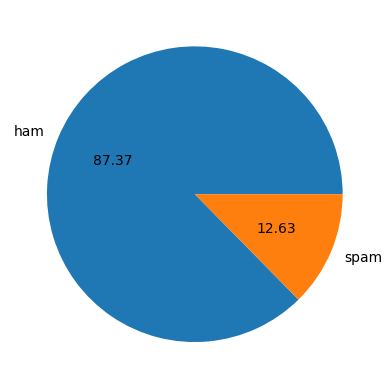

In [157]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [158]:
#data is imbalanced

In [159]:
import nltk

In [160]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANSHUMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [161]:
df['num_characters']=df['text'].apply(len)

In [162]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [163]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [164]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [165]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [166]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [167]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [168]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [169]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

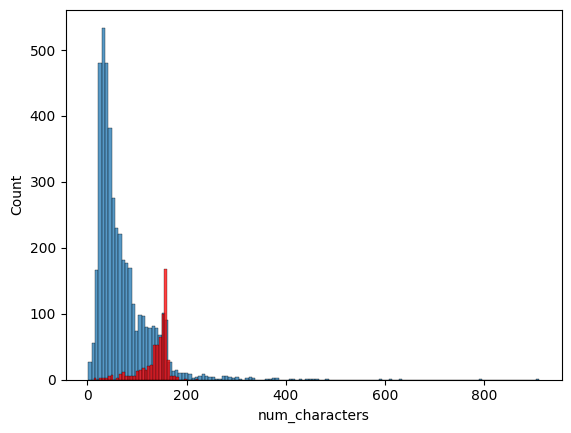

In [170]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

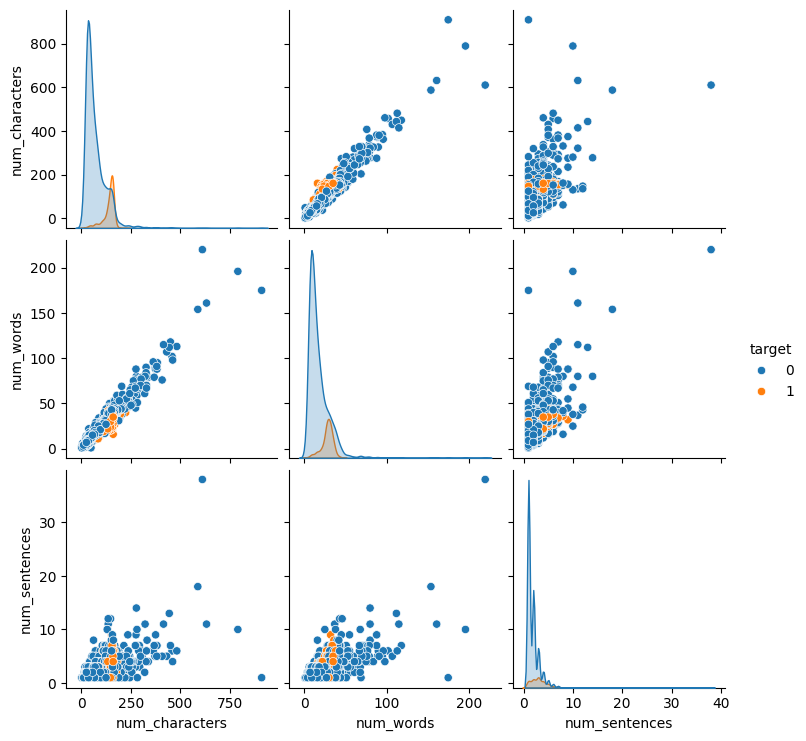

In [171]:
sns.pairplot(df,hue='target')

<Axes: >

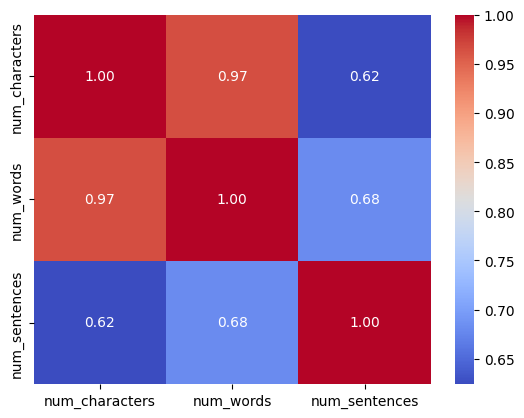

In [172]:
#correlation coeffcient
# Check if the DataFrame contains numeric columns and select only those for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [173]:
# 3) DATA PROCESSING
#Lower Case
#Tokenization
#Removing special characters
#Removing stop words and punctuations
#stemming

In [174]:
from nltk.corpus import stopwords
import string


In [175]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANSHUMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [176]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [177]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    
    
    return " ".join(y)

In [178]:
transform_text('I loved the Yt lectures on machine learning. How about you?')

'love yt lectur machin learn'

In [179]:
df['transformed_text']=df['text'].apply(transform_text)

In [180]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [181]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [182]:
spam_text = " ".join(df[df['target'] == 1]['transformed_text'])  # Concatenate transformed_text for spam target
spam_wc = wc.generate(spam_text)  # Generate WordCloud from concatenated text


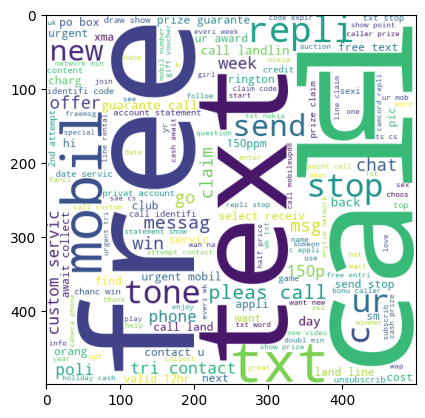

In [183]:
plt.imshow(spam_wc) # showing all spam words

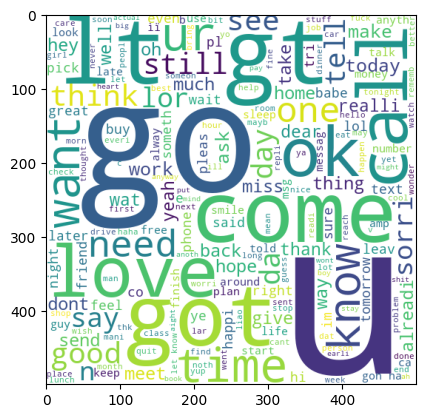

In [184]:
ham_text = " ".join(df[df['target'] == 0]['transformed_text'])
ham_wc = wc.generate(ham_text)
plt.imshow(ham_wc)              # showing ham words

In [186]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [187]:
len(spam_corpus)  # total spam words

9939

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_1016\3695817053.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)  # Rotate x-axis labels by 45 degrees


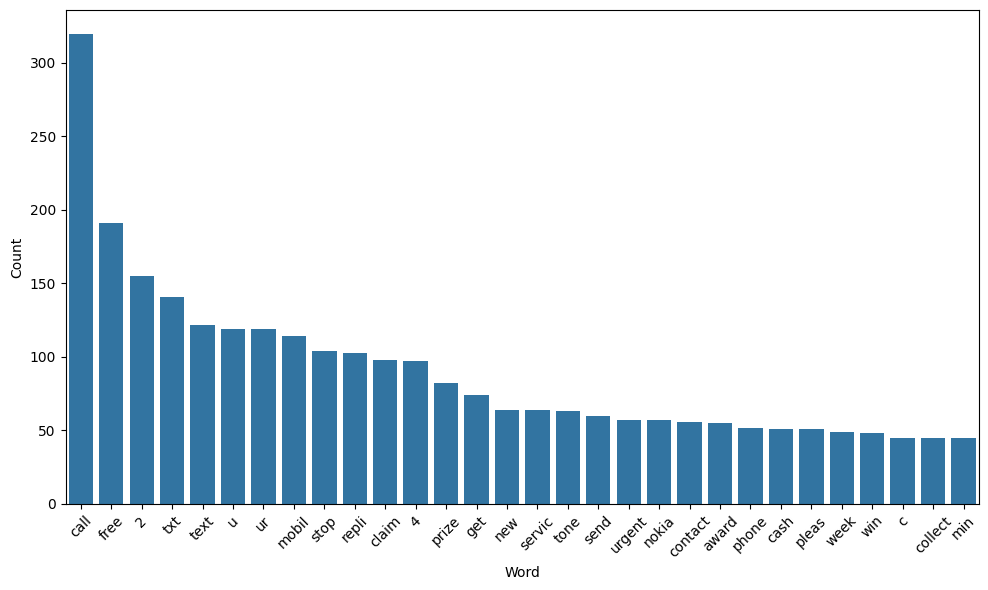

In [191]:
from collections import Counter
import matplotlib.pyplot as plt
word_count = Counter(spam_corpus).most_common(30)
df_word_count = pd.DataFrame(word_count, columns=['Word', 'Count'])

# Creating the barplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plot = sns.barplot(x='Word', y='Count', data=df_word_count)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)  # Rotate x-axis labels by 45 degrees

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [215]:
# 4)MODEL BUILDING
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [216]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [217]:
X.shape

(5169, 3000)

In [218]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [221]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [222]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [223]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))  # 86%accuracy # precision score less is 0.50

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [224]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))  # 100% precision and 97%accuracy

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [225]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))   # 99% precision and 98%accuracy 

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
#Hence we decide to use multinomial NaiveBased ALGORITHM

In [227]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))